In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
from exercise5 import *
from plot_exercise5 import *
register_matplotlib_converters()
%matplotlib inline

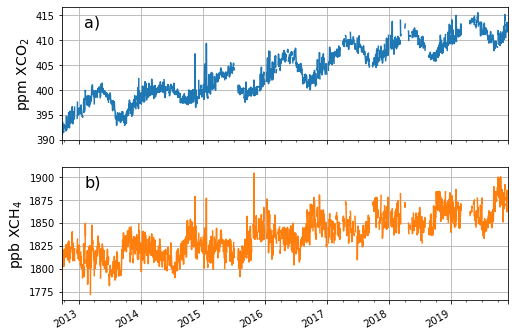

In [2]:
df, lon0, lat0 = read_TCCCON_data()

ax1, ax2 = df[['xco2_ppm', 'xch4_ppm']].plot(figsize=(8,6),subplots=True, grid=True, legend=False)
ax1.set_ylabel('ppm $\mathrm{XCO}_2$', fontsize = 14)
ax1.annotate('a)',xy = (0.05,0.85),xycoords ='axes fraction',zorder =1000, fontsize = 16)
ax2.set_ylabel('ppb $\mathrm{XCH}_4$', fontsize = 14)
ax2.annotate('b)',xy = (0.05,0.85),xycoords ='axes fraction',zorder =1000, fontsize = 16)
ax2.set_xlabel('')
plt.savefig('Time_series.pdf',bbox_inches='tight' )

In [3]:
yearAvg = df.resample('Y').mean()

grXco2 = (yearAvg['xco2_ppm'][-1]-yearAvg['xco2_ppm'][0])/len(yearAvg)

grCH4 = (yearAvg['xch4_ppm'][-1]-yearAvg['xch4_ppm'][0])/len(yearAvg)

print('Average growth rate XCO2 = {:.3f} ppm, Average growth rate XCH4 = {:.3f} ppb'.format(grXco2,1000*grCH4))

Average growth rate XCO2 = 2.201 ppm, Average growth rate XCH4 = 5777.985 ppb


### Validation of total column XCO2 from go sat

In [4]:
df_L_XCO2Go = pd.read_csv('data/XCO2_large_region.csv', index_col=0)
df_L_XCO2Go.index = pd.to_datetime(df_L_XCO2Go.index)

df_L_XCO2Go = df_L_XCO2Go.loc[df_L_XCO2Go['xco2_uncertainty'] < 1.5]
df_L_XCO2Go = df_L_XCO2Go.resample('D').mean()
df_L_XCO2Go = df_L_XCO2Go.reindex(df.index)
std_L = df_L_XCO2Go['xco2_biascorrected'].std()
df_S_XCO2Go = pd.read_csv('data/XCO2_small_region.csv', index_col=0)
df_S_XCO2Go.index = pd.to_datetime(df_S_XCO2Go.index)

df_S_XCO2Go = df_S_XCO2Go.loc[df_S_XCO2Go['xco2_uncertainty'] < 1.5]
df_S_XCO2Go = df_S_XCO2Go.resample('D').mean()
df_S_XCO2Go = df_S_XCO2Go.reindex(df.index)
std_S = df_L_XCO2Go['xco2_biascorrected'].std()

In [5]:
print('Standard diviation tight co location: {:.3f} ppm'.format(std_S))
print('Standard diviation wide co location: {:.3f} ppm'.format(std_L))

Standard diviation tight co location: 4.649 ppm
Standard diviation wide co location: 4.649 ppm


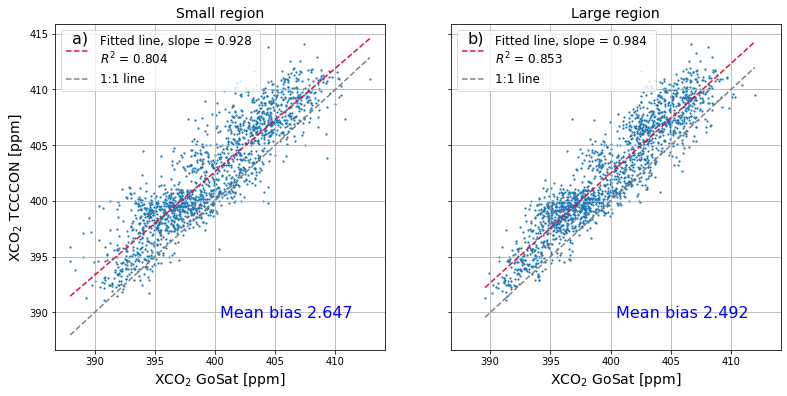

In [6]:
fig, ax = plt.subplots(1,2,figsize =(13,6), sharex=True, sharey=True)
ax[0] = create_scatter(ax[0],df_S_XCO2Go, df_TCCCON=df, key2 = 'xco2_biascorrected', key1 = 'xco2_ppm')
ax[0].set_title('Small region', fontsize=14)
ax[0].set_xlabel('$\mathrm{XCO}_2$ GoSat [ppm]', fontsize = 14)
ax[0].set_ylabel('$\mathrm{XCO}_2$ TCCCON [ppm]', fontsize = 14)
ax[0].annotate('a)',xy = (0.05,0.94),xycoords ='axes fraction',zorder =1000, fontsize = 16)
ax[1] = create_scatter(ax[1],df_L_XCO2Go, df_TCCCON=df, key2 = 'xco2_biascorrected', key1 = 'xco2_ppm')
ax[1].set_title('Large region', fontsize=14)
ax[1].set_xlabel('$\mathrm{XCO}_2$ GoSat [ppm]', fontsize = 14)
ax[1].annotate('b)',xy = (0.05,0.94),xycoords ='axes fraction',zorder =1000, fontsize = 16)
plt.savefig('scatter_plot_XCO2.pdf', bbox_inches='tight' )

### Validation of XCH4 from GoSat

In [7]:
df_L_XCH4Go = pd.read_csv('data/XCH4_large_region.csv', index_col=0)
df_L_XCH4Go.index = pd.to_datetime(df_L_XCH4Go.index)

df_L_XCH4Go = df_L_XCH4Go.loc[df_L_XCH4Go['xch4_uncertainty'] < 1.5]
df_L_XCH4Go = df_L_XCH4Go.resample('D').mean()*1000
df_L_XCH4Go = df_L_XCH4Go.reindex(df.index)
std_L = df_L_XCH4Go['xch4_biascorrected'].std() 

df_S_XCH4Go = pd.read_csv('data/XCH4_small_region.csv', index_col=0)
df_S_XCH4Go.index = pd.to_datetime(df_S_XCH4Go.index)

df_S_XCH4Go = df_S_XCH4Go.loc[df_S_XCH4Go['xch4_uncertainty'] < 1.5]
df_S_XCH4Go = df_S_XCH4Go.resample('D').mean()*1000
df_S_XCH4Go = df_S_XCH4Go.reindex(df.index)
std_S = df_S_XCH4Go['xch4_biascorrected'].std()

In [8]:
print('Standard diviation tight co location: {:.3f} ppb'.format(std_S))
print('Standard diviation wide co location: {:.3f} ppb'.format(std_L))

Standard diviation tight co location: 25.395 ppb
Standard diviation wide co location: 19.201 ppb


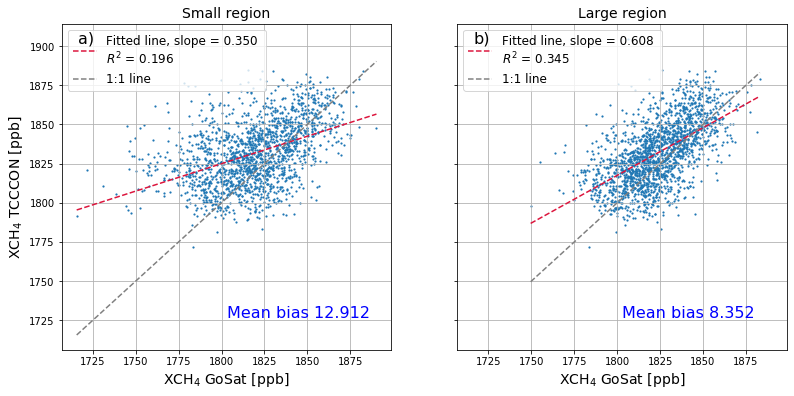

In [9]:
fig, ax = plt.subplots(1,2,figsize =(13,6), sharex=True, sharey=True)
ax[0] = create_scatter(ax[0],df_S_XCH4Go, df_TCCCON=df, key2 = 'xch4_biascorrected', key1 = 'xch4_ppm')
ax[0].set_title('Small region', fontsize=14)
ax[0].set_xlabel('$\mathrm{XCH}_4$ GoSat [ppb]', fontsize = 14)
ax[0].set_ylabel('$\mathrm{XCH}_4$ TCCCON [ppb]', fontsize = 14)
ax[0].annotate('a)',xy = (0.05,0.94),xycoords ='axes fraction',zorder =1000, fontsize = 16)
ax[1] = create_scatter(ax[1],df_L_XCH4Go, df_TCCCON=df, key2 = 'xch4_biascorrected', key1 = 'xch4_ppm')
ax[1].set_title('Large region', fontsize=14)
ax[1].set_xlabel('$\mathrm{XCH}_4$ GoSat [ppb]', fontsize = 14)
ax[1].annotate('b)',xy = (0.05,0.94),xycoords ='axes fraction',zorder =1000, fontsize = 16)
plt.savefig('scatter_plot_XCO2.pdf', bbox_inches='tight' )